In [3]:
from songs import *

# XOR test

Это копия одного из базовых примеров к NEAT-python


 ****** Running generation 0 ****** 

Population's average fitness: 2.00000 stdev: 0.00000
Best fitness: 2.00000 - size: (1, 0) - species 1 - id 1
Average adjusted fitness: 0.000
Mean genetic distance 0.623, standard deviation 0.451
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   150      2.0    0.000     0
Total extinctions: 0
Generation time: 0.007 sec

 ****** Running generation 1 ****** 

Population's average fitness: 2.02997 stdev: 0.11117
Best fitness: 2.65735 - size: (1, 1) - species 1 - id 276
Average adjusted fitness: 0.030
Mean genetic distance 1.057, standard deviation 0.556
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   150      2.7    0.030     0
Total extinctions: 0
Generation time: 0.009 sec (0.008 average)

 ****** Running generation 2 ****** 

Population's average fitness: 2.16789 stdev: 0.

Population's average fitness: 2.28216 stdev: 0.36444
Best fitness: 3.45393 - size: (2, 4) - species 1 - id 3255
Average adjusted fitness: 0.358
Mean genetic distance 1.547, standard deviation 0.386
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   27   150      3.5    0.358     6
Total extinctions: 0
Generation time: 0.017 sec (0.021 average)

 ****** Running generation 28 ****** 

Population's average fitness: 2.37616 stdev: 0.38637
Best fitness: 3.45393 - size: (2, 4) - species 1 - id 3255
Average adjusted fitness: 0.376
Mean genetic distance 1.529, standard deviation 0.444
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   28   150      3.5    0.376     7
Total extinctions: 0
Generation time: 0.017 sec (0.021 average)

 ****** Running generation 29 ****** 

Population's average fitness: 2.31102 stdev: 0.35992
Best fitnes

Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   46   150      3.5    0.472     0
Total extinctions: 0
Generation time: 0.018 sec (0.020 average)

 ****** Running generation 47 ****** 

Population's average fitness: 2.35547 stdev: 0.41297
Best fitness: 3.49761 - size: (2, 4) - species 1 - id 6894
Average adjusted fitness: 0.382
Mean genetic distance 1.556, standard deviation 0.359
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   47   150      3.5    0.382     1
Total extinctions: 0
Generation time: 0.018 sec (0.019 average)

 ****** Running generation 48 ****** 

Population's average fitness: 2.37134 stdev: 0.44896
Best fitness: 3.49761 - size: (2, 4) - species 1 - id 6894
Average adjusted fitness: 0.538
Mean genetic distance 1.513, standard deviation 0.389
Population of 150 members in 1 species:
   ID   age  size  fitne

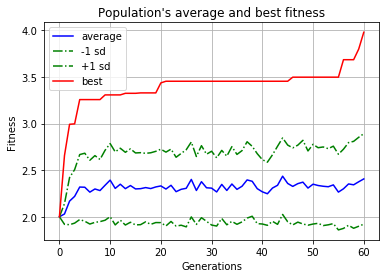

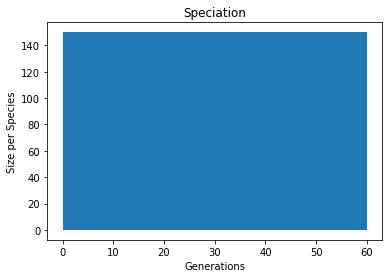

In [4]:
from __future__ import print_function
import os
import neat
import visualise

# чо хотим
xor_inputs = [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
xor_outputs = [   (0.0,),     (1.0,),     (1.0,),     (0.0,)]

# оцениваем нейросети - должны выдать каждой нейросети число, т.е. её крутость
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:  # перебор нейросетей
        # по дефолту нулевые нейросети совсем дно и убиваются алгоритмом
        genome.fitness = 4.0
        # "создаём" сеть по геному
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        # для каждого из четырёх возможных входов
        for xi, xo in zip(xor_inputs, xor_outputs):
            # получаем выход нейросети
            output = net.activate(xi)
            # вычитаем MSE
            genome.fitness -= (output[0] - xo[0]) ** 2


def run(config_file):
    # Загрузка конфигурации
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Создание популяции
    p = neat.Population(config)

    # Местная технология промежуточных сохранений и вывода логов
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    p.add_reporter(neat.Checkpointer(5))

    # Запускаем не более 300 поколений
    winner = p.run(eval_genomes, 300)

    # Умеет отображать текстом геном
    print('\nBest genome:\n{!s}'.format(winner))

    # Проверка, что на всех четырёх выходах и вправду всё окей
    print('\nOutput:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    for xi, xo in zip(xor_inputs, xor_outputs):
        output = winner_net.activate(xi)
        print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

    # визуализация через graphviz
    node_names = {-1:'A', -2: 'B', 0:'A XOR B'}    
    visualise.draw_net(config, winner, True, node_names=node_names)
    visualise.plot_stats(stats, ylog=False, view=True)
    visualise.plot_species(stats, view=True)

    #p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-4')
    #p.run(eval_genomes, 10)

run('config-feedforward')

# NEAT

Пробуем (безуспешно) заставить играть кузнечика

In [ ]:
from __future__ import print_function
import os
import neat
import math

MEMORY_TIMES = 32
STARTER = 8

kuznechik = Song('basic midi/track (1).mid')

# положительное число - клавиша нажата. Иначе отрицательное
def threshold(keyboard):
    return (np.array(keyboard) > 0).astype(int)

# тут пробовалось много разных вариантов
def evaluate(output, truth):
    ans = 0
    for p, t in zip(output, truth):
        if t == 0:
            if p > 0:
                ans += 1 / (1 + math.exp(p))
            else:
                ans += 1
        if t == 1:
            if p <= 0:
                ans += 1 / (1 + math.exp(-p))
            else:
                ans += 1
    return ans / 13
        
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = 1.0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        memory = -np.ones((13 * MEMORY_TIMES))
        
        # Ещё можно за не ноль в нуле штрафовать, но так ему только ещё хуже становится
        #output = net.activate(memory)
        #genome.fitness -= (np.array(output)**2).sum()
        
        #if (threshold(output) != np.zeros((13))).any():
        #    continue        
                    
        memory[-STARTER*13:] = kuznechik.notes[:STARTER].flatten()        
        for i in range(STARTER, 128):
            output = net.activate(memory)            
            
            if (threshold(output) == kuznechik.notes[i]).all():
                genome.fitness += 1
            else:
                genome.fitness += evaluate(output, kuznechik.notes[i])
                break
            
            memory = np.append(memory[13:], kuznechik.notes[i])


def run(config_file):
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    p = neat.Population(config)

    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    p.add_reporter(neat.Checkpointer(5))

    winner = p.run(eval_genomes, 50000)

    print('\nBest genome:\n{!s}'.format(winner))

    print('\nOutput:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)

    node_names = {0:'C', 1: 'C#', 2: "D", 3: "D#", 4: "E", 5: "F", 6: "F#", 7: "G", 8: "G#", 9: "A", 10: "A#", 11: "B", 12: "C1"}
    
    visualise.draw_net(config, winner, True, node_names=node_names)
    visualise.plot_stats(stats, ylog=False, view=True)
    visualise.plot_species(stats, view=True)
    
run('first_exp.config')

Танцами с бубном удавалось добиться правильной игры 19 первых долей за тысячи поколений.